# Logistic Regression (Titanic_pydatatset)



https://pydataset.readthedocs.io/en/latest/index.html 


Dataset is for educational purposes, mainly. It tries to help those approaching Data Science in Python for the first time, who must deal with common (and time consuming) data preparation tasks.

In [1]:
# !pip install pydataset

In [2]:
# Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pydataset import data

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# Get the data
titanic = data('titanic')
titanic.sample(5)

,class,age,sex,survived
746,3rd class,adults,man,no
333,2nd class,adults,man,yes
27,1st class,adults,man,yes
11,1st class,adults,man,yes
1049,3rd class,adults,man,no


In [4]:
# Feature Engineering (One hot encoding)
# Could use LabelEncoder from sklearn.preprocessing
titanic = pd.get_dummies(titanic, drop_first=True) # there is no class one
titanic.sample(15)

,class_2nd class,class_3rd class,age_child,sex_women,survived_yes
223,0,0,0,1,1
638,0,1,0,0,1
803,0,1,0,0,0
387,1,0,0,0,0
573,1,0,0,1,1
349,1,0,0,0,0
608,1,0,1,1,1
89,0,0,0,0,0
465,1,0,0,0,0
238,0,0,0,1,1


In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('survived_yes', axis=1), titanic['survived_yes'])

In [6]:
# Train the model using the training data
solver='lbfgs'
LogReg = LogisticRegression(solver=solver)
LogReg.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Predicting if a class-l child-age female survived
LogReg.predict(np.array([[0, 0, 1, 1]]))[0]

C:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [8]:
LogReg.score(X_test, y_test) # is like accuracy # TODO: search about score

0.790273556231003

In [9]:
# Understanding the score
prediction = (LogReg.predict(X_test) > 0.5).astype(int)
np.sum(prediction == y_test) / len(y_test)

0.790273556231003

In [10]:
df_titan = pd.read_csv('titanic.csv', header=None)

In [11]:
# Predicting if a class-l adult-age male survived
LogReg.predict(df_titan.values)

C:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1, 1], dtype=uint8)

In [12]:
# Scoring the model
LogReg.predict_proba(df_titan.values)

C:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.35005812, 0.64994188],
       [0.05445269, 0.94554731],
       [0.13349107, 0.86650893]])

In [13]:
accuracies = []
for max_iter in range(3, 10):
    LogReg = LogisticRegression(
        solver='newton-cg',
        max_iter=max_iter,
        random_state=42,
        tol=1e-100
    )
    
    LogReg.fit(X_train, y_train)
    accuracy = LogReg.score(X_test, y_test)
    accuracies.append(accuracy)

C:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\MAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  

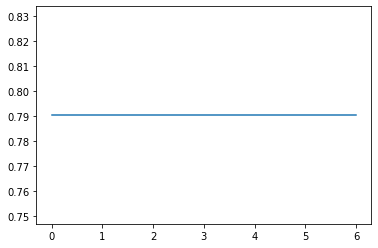

In [14]:
plt.plot(accuracies)